In [175]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Datos Cualitativos 

In [2]:
titanic = sns.load_dataset("titanic")

In [14]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [26]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null category
pclass         891 non-null category
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(4), float64(2), int64(2), object(5)
memory usage: 68.6+ KB


In [27]:
titanic['survived'] = pd.Categorical(titanic['survived'])
titanic['pclass'] = pd.Categorical(titanic['pclass'])
titanic['sex'] = pd.Categorical(titanic['sex'])

# Tablas de contingencia de una variable

In [183]:
tab = pd.crosstab(index = titanic['survived'], 
                columns = 'pasajeros')
tab

col_0,pasajeros
survived,
0,549
1,342


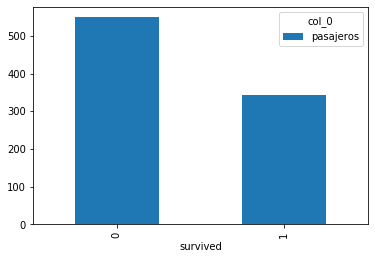

In [185]:
tab.plot(kind = "bar")

In [40]:
pd.crosstab(index = titanic['pclass'],
           columns = 'pasajeros')

col_0,pasajeros
pclass,
1,216
2,184
3,491


In [41]:
pd.crosstab(index = titanic['sex'],
           columns = 'pasajeros')

col_0,pasajeros
sex,
female,314
male,577


In [62]:
pd.crosstab(index = titanic['deck'],
           columns = titanic["sex"],
           colnames = ['Gender'],
           rownames = ['Cubierta']
           )

Gender,female,male
Cubierta,,
A,1,14
B,27,20
C,27,32
D,18,15
E,15,17
F,5,8
G,4,0


In [58]:
tab/tab.sum()

col_0,pasajeros
survived,
0,0.616162
1,0.383838


# Tablas de contingencia de dos variables

In [191]:
survived_sex = pd.crosstab(index = titanic['survived'],
                          columns = titanic['sex'],
                          margins=True)
survived_sex.index = ['Fallecio', 'Sobrevivio','Total']
survived_sex.columns = ['Mujer', 'Hombre', 'Total']
survived_sex

,Mujer,Hombre,Total
Fallecio,81,468,549
Sobrevivio,233,109,342
Total,314,577,891


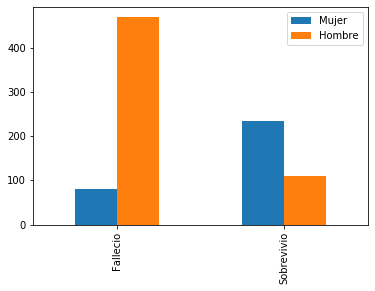

In [201]:
survived_sex.iloc[:-1,:-1].plot(kind="bar")
plt.show()

In [87]:
survived_sex/survived_sex[:-1].sum()

,Mujer,Hombre,Total
Fallecio,0.257962,0.811092,0.616162
Sobrevivio,0.742038,0.188908,0.383838
Total,1.000000,1.000000,1.000000


In [121]:
survived_class = pd.crosstab(index = titanic['survived'],
                            columns = titanic['pclass'],
                            colnames = ['Clase'],
                            margins = True)
survived_class.index = ['Fallecio', 'Sobrevivio', 'Total_Clase']
survived_class.columns = ['Primera', 'Segunda', 'Tercera','Total_Superv']
survived_class

,Primera,Segunda,Tercera,Total_Superv
Fallecio,80,97,372,549
Sobrevivio,136,87,119,342
Total_Clase,216,184,491,891


## Frecuencia relativas globales

In [122]:
survived_class/survived_class.loc["Total_Clase","Total_Superv"]

,Primera,Segunda,Tercera,Total_Superv
Fallecio,0.089787,0.108866,0.417508,0.616162
Sobrevivio,0.152637,0.097643,0.133558,0.383838
Total_Clase,0.242424,0.206510,0.551066,1.000000


## Frecuencia relativas marginales

In [124]:
survived_class/survived_class.loc["Total_Clase"]

,Primera,Segunda,Tercera,Total_Superv
Fallecio,0.37037,0.527174,0.757637,0.616162
Sobrevivio,0.62963,0.472826,0.242363,0.383838
Total_Clase,1.00000,1.000000,1.000000,1.000000


In [131]:
survived_class.T/survived_class["Total_Superv"]

,Fallecio,Sobrevivio,Total_Clase
Primera,0.145719,0.397661,0.242424
Segunda,0.176685,0.254386,0.206510
Tercera,0.677596,0.347953,0.551066
Total_Superv,1.000000,1.000000,1.000000


In [133]:
survived_class.div(survived_class["Total_Superv"], axis=0)

,Primera,Segunda,Tercera,Total_Superv
Fallecio,0.145719,0.176685,0.677596,1.0
Sobrevivio,0.397661,0.254386,0.347953,1.0
Total_Clase,0.242424,0.206510,0.551066,1.0


# Tablas Multidimensionales

In [189]:
surv_sex_class = pd.crosstab(index = titanic['survived'],
                            columns = [titanic['sex'],titanic['pclass']],
                            margins = True)
surv_sex_class.index = ["Fallecio","Sobrevivio","Total_Superv"]
surv_sex_class

sex          female          male            All
pclass            1   2    3    1    2    3     
Fallecio          3   6   72   77   91  300  549
Sobrevivio       91  70   72   45   17   47  342
Total_Superv     94  76  144  122  108  347  891

## Frecuencia relativa global

In [154]:
surv_sex_class/surv_sex_class.iloc[2,6]

sex             female                          male                     \
pclass               1         2         3         1         2        3   
Fallecio      0.003367  0.006734  0.080808  0.086420  0.102132  0.33670   
Sobrevivio    0.102132  0.078563  0.080808  0.050505  0.019080  0.05275   
Total_Superv  0.105499  0.085297  0.161616  0.136925  0.121212  0.38945   

sex                All  
pclass                  
Fallecio      0.616162  
Sobrevivio    0.383838  
Total_Superv  1.000000

## Frecuencia relativa marginal

In [170]:
surv_sex_class/surv_sex_class.loc['Total_Superv']

sex             female                     male                           All
pclass               1         2    3         1         2         3          
Fallecio      0.031915  0.078947  0.5  0.631148  0.842593  0.864553  0.616162
Sobrevivio    0.968085  0.921053  0.5  0.368852  0.157407  0.135447  0.383838
Total_Superv  1.000000  1.000000  1.0  1.000000  1.000000  1.000000  1.000000

In [174]:
surv_sex_class.div(surv_sex_class['All'], axis = 0)

sex             female                          male                      All
pclass               1         2         3         1         2         3     
Fallecio      0.005464  0.010929  0.131148  0.140255  0.165756  0.546448  1.0
Sobrevivio    0.266082  0.204678  0.210526  0.131579  0.049708  0.137427  1.0
Total_Superv  0.105499  0.085297  0.161616  0.136925  0.121212  0.389450  1.0

Fallecio        549
Sobrevivio      342
Total_Superv    891
Name: All, dtype: int64